# 18.303 Pset 4 Solutions, Fall 2016

## Problem 1

Derivatives of Bessel functions and other conveniences from the lecture 8 notebook:

In [2]:
besseljp(m,x) = 0.5 * (besselj(m-1,x) - besselj(m+1,x))
besselyp(m,x) = 0.5 * (bessely(m-1,x) - bessely(m+1,x))
using PyPlot
using PyCall
@pyimport scipy.optimize as s

### part (b)

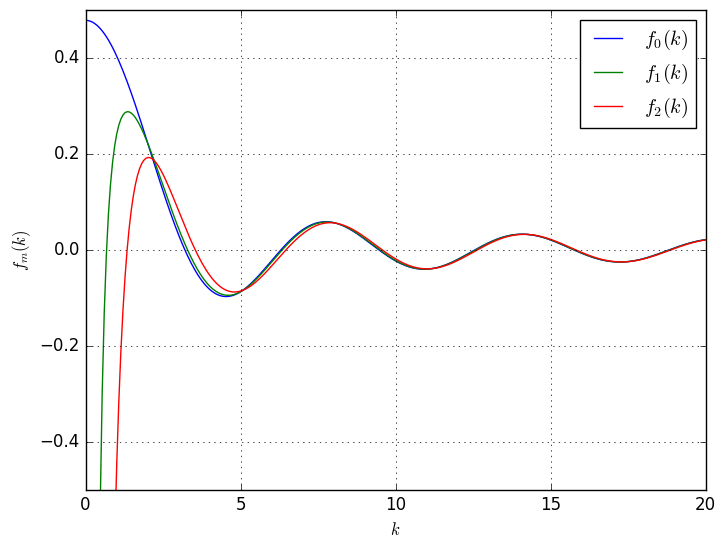

(-0.5,0.5)

In [3]:
R1 = 1
R2 = 2
f(m,k) = besseljp(m,k*R1).*besselyp(m,k*R2) - besseljp(m,k*R2).*besselyp(m,k*R1) # use .* to work with vectors
k = linspace(0,20,300)
plot(k, f(0,k))
plot(k, f(1,k))
plot(k, f(2,k))
xlabel(L"$k$")
ylabel(L"$f_m(k)$")
legend([L"$f_0(k)$", L"$f_1(k)$", L"$f_2(k)$"])
grid()
ylim(-0.5, 0.5) # rescale the y axis so that we can see the plot without the k=0 divergence

### part (c)

In [4]:
k1 = s.newton(k -> f(0,k), 4)
k2 = s.newton(k -> f(0,k), 6)
k3 = s.newton(k -> f(0,k), 9)
(k1,k2,k3)

(3.196578380810546,6.312349510373263,9.444464925482272)

For fun, let's plot these solutions.  (This is *not* required by the pset, but it is a good check to make sure the solutions look sensible and satisfy the Neumann boundary conditions.)

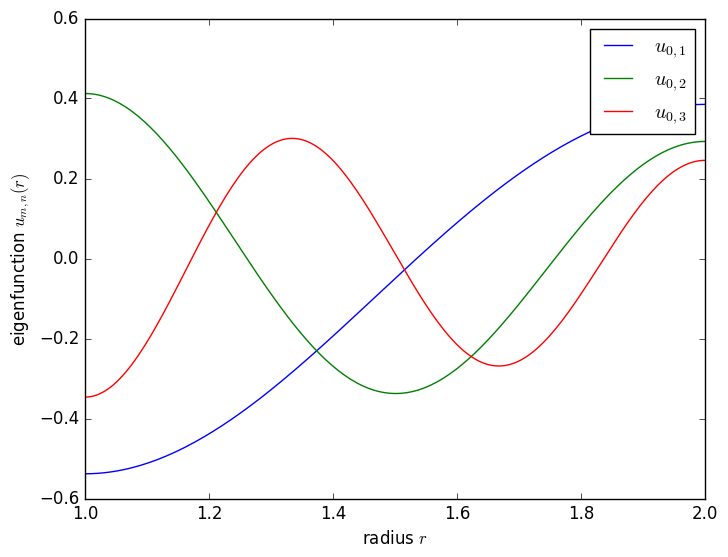

(1,2)

In [6]:
# use our alpha and beta coefficients from part (a)
u(m,k,r) = besselj(m,k*r) - bessely(m,k*r) * (besseljp(m,k*R1) / besselyp(m,k*R1))
r = linspace(R1, R2, 200)
plot(r, u(0,k1,r))
plot(r, u(0,k2,r))
plot(r, u(0,k3,r))
xlabel(L"radius $r$")
ylabel(L"eigenfunction $u_{m,n}(r)$")
legend([L"$u_{0,1}$", L"$u_{0,2}$", L"$u_{0,3}$"])
xlim(R1, R2)

### part (d)

Check that $\int_{R_1}^{R_2} r u_{0,1}(r) u_{0,2}(r) dr = 0$ (up to roundoff errors):

In [7]:
quadgk(r -> r * u(0,k1,r) * u(0,k2,r), R1, R2, abstol=1e-8)

(2.2065682614424986e-15,1.4191231523241754e-11)